In [118]:
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#LGBM Model
import lightgbm as lgb

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [47]:
df_recommended= pd.read_excel('Cropping_System.xlsx')

In [48]:
df_recommended.shape

(360, 7)

In [49]:
df_recommended.head()

,SAMPLE,LATITUTE,LONGITUDE,Season,SQI,TEXTURAL CLASS,Label
0,1,26.733005,93.077304,Kharif,0.77,Clay loam,Rice
1,2,26.733005,93.077304,Rabi,0.77,Clay loam,Fallow
2,3,26.715920,93.088185,Kharif,0.84,Clay loam,Rice
3,4,26.715920,93.088185,Rabi,0.84,Clay loam,Fallow
4,5,26.711278,93.103950,Kharif,0.85,Clay loam,Rice


In [50]:
df_recommended.tail()

,SAMPLE,LATITUTE,LONGITUDE,Season,SQI,TEXTURAL CLASS,Label
355,356,26.931202,93.735914,Rabi,0.497533,Sandy loam,Rabi_vegetables
356,357,26.861800,93.626930,Kharif,0.501631,Sandy loam,Rice
357,358,26.861800,93.626930,Rabi,0.501631,Sandy loam,Rabi_vegetables
358,359,26.859667,93.620315,Kharif,0.526805,Sandy loam,Rice
359,360,26.859667,93.620315,Rabi,0.526805,Sandy loam,Rabi_vegetables


In [51]:
df_recommended.columns

Index(['SAMPLE', 'LATITUTE', 'LONGITUDE', 'Season', 'SQI', 'TEXTURAL CLASS',
       'Label'],
      dtype='object')

In [52]:
df_recommended.duplicated().sum()

0

In [53]:
df_recommended.isnull().sum()

SAMPLE            0
LATITUTE          0
LONGITUDE         0
Season            0
SQI               0
TEXTURAL CLASS    0
Label             0
dtype: int64

In [54]:
df_recommended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SAMPLE          360 non-null    int64  
 1   LATITUTE        360 non-null    float64
 2   LONGITUDE       360 non-null    float64
 3   Season          360 non-null    object 
 4   SQI             360 non-null    float64
 5   TEXTURAL CLASS  360 non-null    object 
 6   Label           360 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 19.8+ KB


In [55]:
df_recommended.describe()

,SAMPLE,LATITUTE,LONGITUDE,SQI
count,360.000000,360.000000,360.000000,360.000000
mean,180.500000,26.854288,93.455423,0.620505
std,104.067286,0.057695,0.203724,0.092878
min,1.000000,26.711278,93.067830,0.486181
25%,90.750000,26.819475,93.232862,0.550000
50%,180.500000,26.861470,93.537795,0.600000
75%,270.250000,26.896276,93.629217,0.660000
max,360.000000,26.953972,93.735914,0.870000


In [56]:
df_recommended.nunique()

SAMPLE            360
LATITUTE          162
LONGITUDE         160
Season              2
SQI                82
TEXTURAL CLASS      4
Label               6
dtype: int64

In [57]:
df_recommended['Label'].unique()

array(['Rice', 'Fallow', 'Potato', 'Rapseed', 'Blackgram',
       'Rabi_vegetables'], dtype=object)

In [58]:
df_recommended['Label'].value_counts()

Rice               160
Fallow             145
Rabi_vegetables     20
Potato              15
Rapseed             11
Blackgram            9
Name: Label, dtype: int64

In [59]:
crop_summary =pd.pivot_table(df_recommended, index=['Label'], aggfunc='mean')

In [60]:
crop_summary

,LATITUTE,LONGITUDE,SAMPLE,SQI
Label,,,,
Blackgram,26.844390,93.543532,190.000000,0.601111
Fallow,26.847410,93.440232,166.551724,0.624912
Potato,26.844208,93.321618,106.000000,0.657333
Rabi_vegetables,26.911714,93.665912,341.000000,0.560937
Rapseed,26.840890,93.526584,170.000000,0.607273
Rice,26.855766,93.445574,180.250000,0.622506


In [61]:
#Checking and treating outliers in each column

In [62]:
fig= px.box(df_recommended, y='SQI', points='all')

In [63]:
fig.show()

In [64]:
df_recommended_outliertreatment=df_recommended
df_recommended_outliertreatment.columns= df_recommended.columns
df_recommended_outliertreatment.head()


Q1 = np.percentile(df_recommended_outliertreatment['SQI'],25, interpolation='midpoint')
Q3 = np.percentile(df_recommended_outliertreatment['SQI'],75, interpolation='midpoint')

IQR= Q3-Q1

print("Old_shape : ",df_recommended_outliertreatment.shape)

Upper_bound=np.where(df_recommended_outliertreatment['SQI'] >= (Q3 + 1.5 * IQR))

lower_bound=np.where(df_recommended_outliertreatment['SQI'] <= (Q1 - 1.5 * IQR))


df_recommended_outliertreatment.drop(Upper_bound[0], inplace=True)
df_recommended_outliertreatment.drop(lower_bound[0], inplace=True)

print("New_shape : ",df_recommended_outliertreatment.shape)

Old_shape :  (360, 7)
New_shape :  (344, 7)


In [65]:
df_recommended= df_recommended_outliertreatment

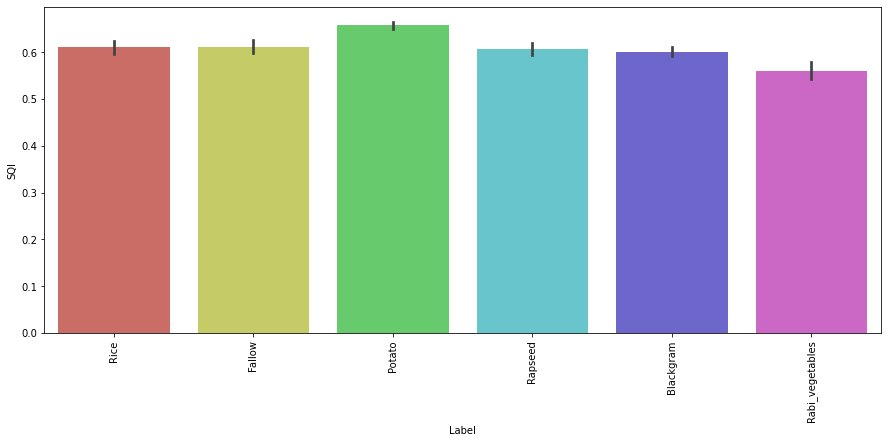

In [70]:
plt.figure(figsize=(15,6))
sns.barplot(y='SQI', x='Label', data=df_recommended, palette='hls')
plt.xticks(rotation=90)
plt.show()

In [71]:
crop_summary_new = df_recommended.copy()

In [76]:
fig1= px.bar(crop_summary_new, x='Label', y='SQI')
fig1.show()

In [77]:
df_recommended.corr()

,SAMPLE,LATITUTE,LONGITUDE,SQI
SAMPLE,1.000000,0.768939,0.946843,-0.825471
LATITUTE,0.768939,1.000000,0.755021,-0.671707
LONGITUDE,0.946843,0.755021,1.000000,-0.879340
SQI,-0.825471,-0.671707,-0.879340,1.000000


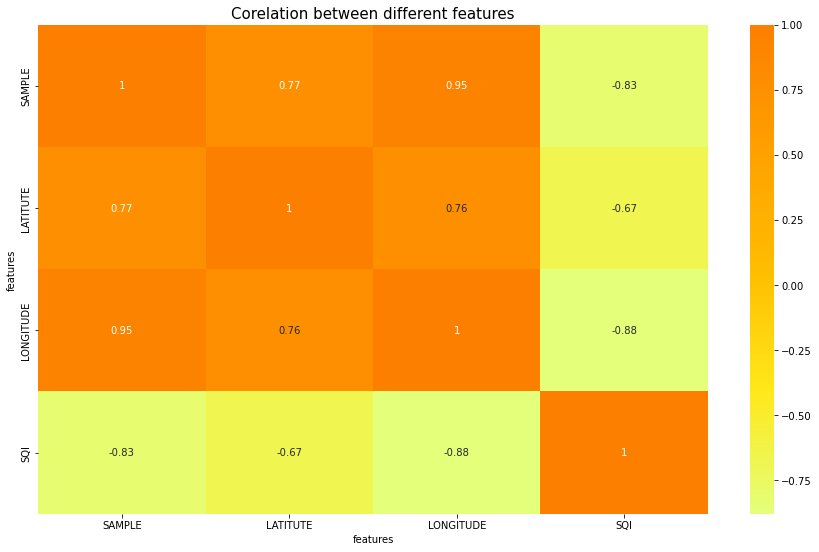

In [84]:
fig, ax=plt.subplots(1,1, figsize=(15,9))
sns.heatmap(df_recommended.corr(),annot=True, cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('Corelation between different features', fontsize=15, c='black')
plt.show()

In [94]:
df_recommended_encoded= pd.get_dummies(df_recommended, columns=['Season','TEXTURAL CLASS'])

In [95]:
df_recommended_encoded.head()

,SAMPLE,LATITUTE,LONGITUDE,SQI,Label,Season_Kharif,Season_Rabi,TEXTURAL CLASS_Clay loam,TEXTURAL CLASS_Sandy loam,TEXTURAL CLASS_clay loam,TEXTURAL CLASS_sandy loam
0,1,26.733005,93.077304,0.77,Rice,1,0,1,0,0,0
1,2,26.733005,93.077304,0.77,Fallow,0,1,1,0,0,0
6,7,26.719570,93.112062,0.80,Rice,1,0,1,0,0,0
7,8,26.719570,93.112062,0.80,Fallow,0,1,1,0,0,0
8,9,26.769529,93.076980,0.81,Rice,1,0,1,0,0,0


In [96]:
X= df_recommended_encoded.drop('Label', axis=1)
y= df_recommended_encoded['Label']

In [97]:

X_train,X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, shuffle=True, random_state=0)

In [98]:

model= lgb.LGBMClassifier()
model.fit(X_train,y_train)

LGBMClassifier()

In [111]:
y_pred=model.predict(X_test)

In [112]:
print("LightGBM Model accuracy score is :{0:0.4f}.".format(accuracy_score(y_pred,y_test)))

LightGBM Model accuracy score is :0.9712.


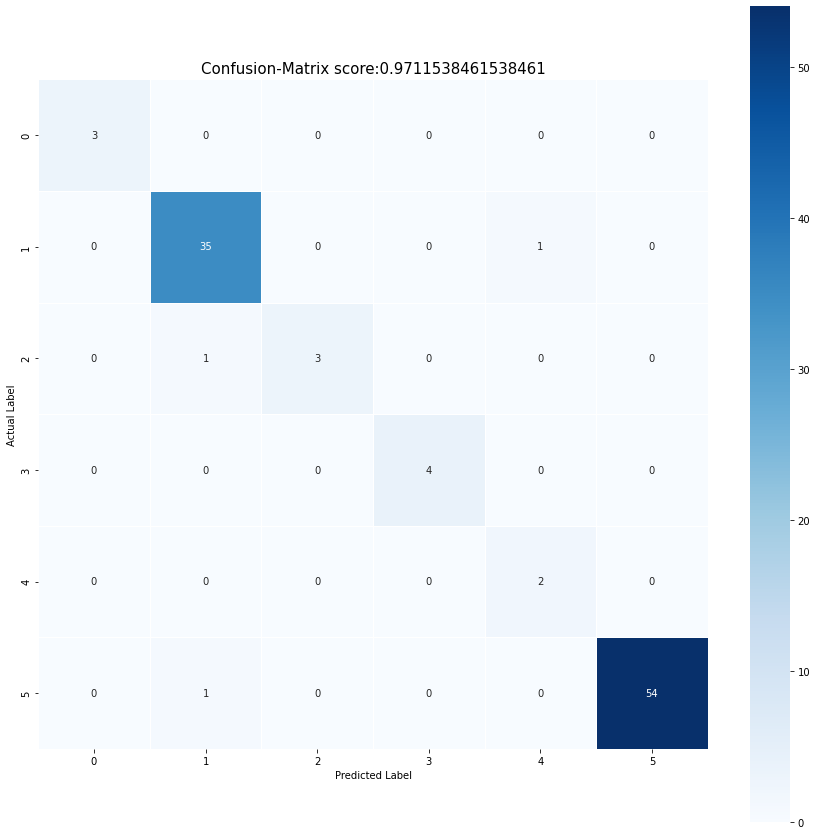

In [117]:
lgbm_cm= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(lgbm_cm, annot=True, fmt='.0f', linewidths=.5, square=True, cmap='Blues');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title="Confusion-Matrix score:" + str(accuracy_score(y_pred,y_test))
plt.title(all_sample_title, size=15)
plt.show()

In [119]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

      Blackgram       1.00      1.00      1.00         3
         Fallow       0.95      0.97      0.96        36
         Potato       1.00      0.75      0.86         4
Rabi_vegetables       1.00      1.00      1.00         4
        Rapseed       0.67      1.00      0.80         2
           Rice       1.00      0.98      0.99        55

       accuracy                           0.97       104
      macro avg       0.94      0.95      0.93       104
   weighted avg       0.97      0.97      0.97       104



In [120]:
#DecisionTreeClassifier

In [121]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [122]:
y_pred= classifier.predict(X_test)

In [123]:
print("Decision tree model accuracy score:{0:0.4f}".format(accuracy_score(y_test, y_pred)))

Decision tree model accuracy score:0.9808


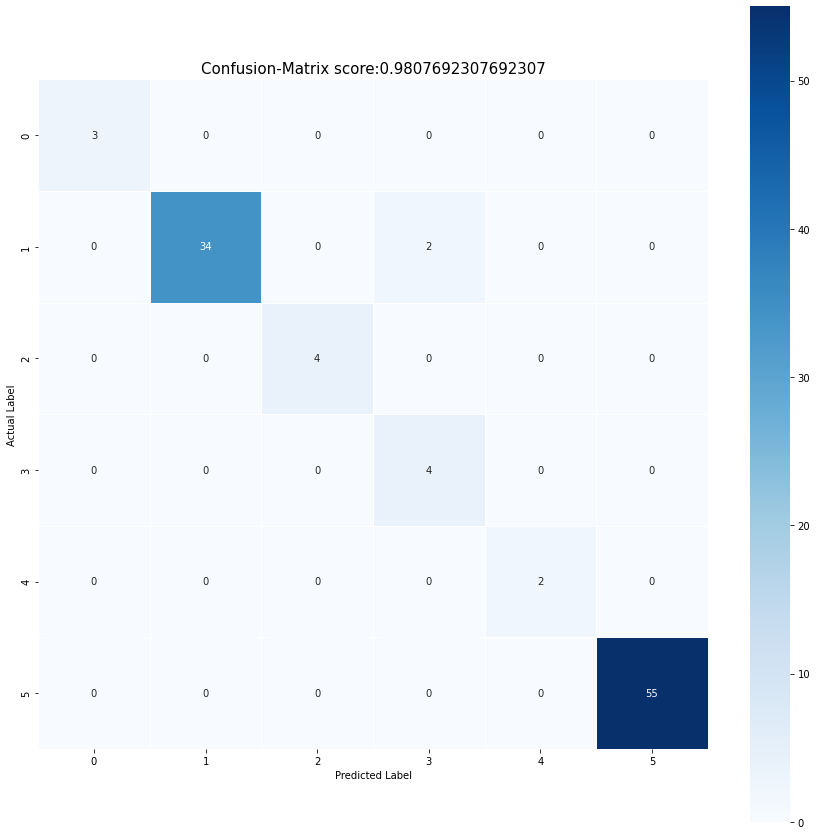

In [124]:
decisiontree_cm= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(decisiontree_cm, annot=True, fmt='.0f', linewidths=.5, square=True, cmap='Blues');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title="Confusion-Matrix score:" + str(accuracy_score(y_pred,y_test))
plt.title(all_sample_title, size=15)
plt.show()

In [125]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

      Blackgram       1.00      1.00      1.00         3
         Fallow       1.00      0.94      0.97        36
         Potato       1.00      1.00      1.00         4
Rabi_vegetables       0.67      1.00      0.80         4
        Rapseed       1.00      1.00      1.00         2
           Rice       1.00      1.00      1.00        55

       accuracy                           0.98       104
      macro avg       0.94      0.99      0.96       104
   weighted avg       0.99      0.98      0.98       104



In [126]:
classifier_lr= LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [127]:
y_pred= classifier_lr.predict(X_test)

In [128]:
print("Logistic Regression model accuracy score:{0:0.4f}".format(accuracy_score(y_test, y_pred)))

Logistic Regression model accuracy score:0.8365


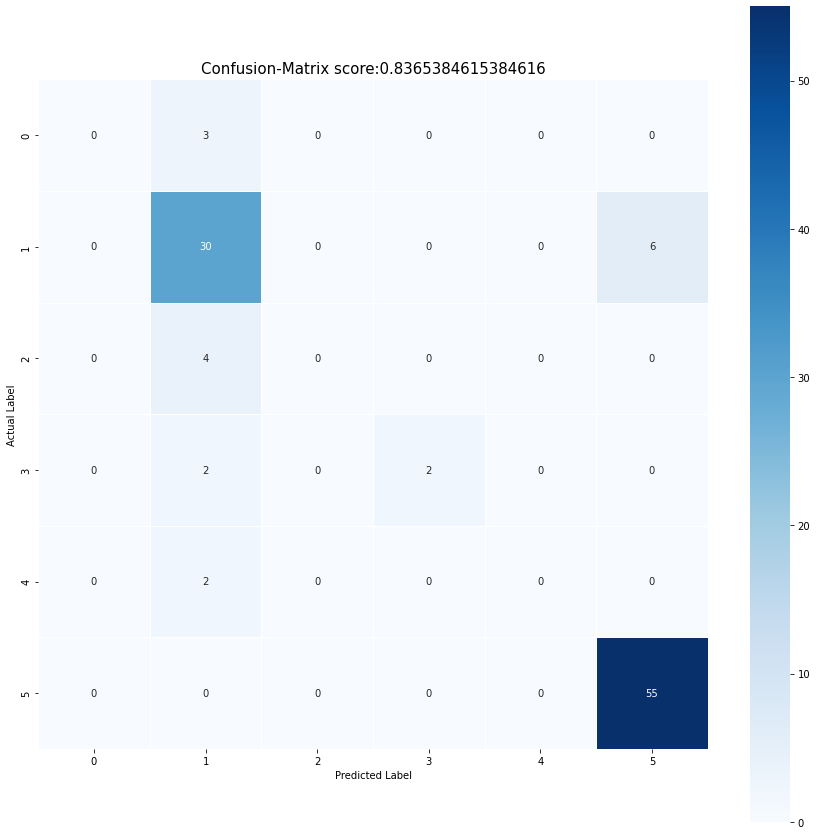

In [129]:
logistic_cm= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(logistic_cm, annot=True, fmt='.0f', linewidths=.5, square=True, cmap='Blues');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title="Confusion-Matrix score:" + str(accuracy_score(y_pred,y_test))
plt.title(all_sample_title, size=15)
plt.show()

In [130]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

      Blackgram       0.00      0.00      0.00         3
         Fallow       0.73      0.83      0.78        36
         Potato       0.00      0.00      0.00         4
Rabi_vegetables       1.00      0.50      0.67         4
        Rapseed       0.00      0.00      0.00         2
           Rice       0.90      1.00      0.95        55

       accuracy                           0.84       104
      macro avg       0.44      0.39      0.40       104
   weighted avg       0.77      0.84      0.80       104



In [131]:
X_test[0:1]

,SAMPLE,LATITUTE,LONGITUDE,SQI,Season_Kharif,Season_Rabi,TEXTURAL CLASS_Clay loam,TEXTURAL CLASS_Sandy loam,TEXTURAL CLASS_clay loam,TEXTURAL CLASS_sandy loam
157,158,26.820864,93.552091,0.58,0,1,0,1,0,0


In [133]:
result= classifier.predict(X_test[0:1])

In [134]:
result

array(['Fallow'], dtype=object)

In [135]:
y_test[0:1]

157    Fallow
Name: Label, dtype: object

In [ ]:
result= classifier.predict()